# **MÓDULO 13**
# Projeto - Fundamentos da Descoberta de Dados

Nesse projeto trabalharemos com a base de dados de produtos de um supermercado do Chile.
A ideia é que vocês apliquem os conceitos estatísticos vistos no último módulo, mais os conceitos de visualizações de dados através de gráficos e finalizem publicando no seu github!

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

Faça a leitura dos dados do arquivo CSV:


Altere o código abaixo de acordo com seu diretório.

In [78]:
df = pd.read_csv("MODULO7_PROJETOFINAL_BASE_SUPERMERCADO.csv")

df.head(10)

,title,Marca,Preco_Normal,Preco_Desconto,Preco_Anterior,Desconto,Categoria
0,"Pack 12 un, Leche extra proteína 1 L",Loncoleche,19788,0,0,0,lacteos
1,"Pack 12 un, Leche chocolate receta original 1 L",Soprole,18228,0,0,0,lacteos
2,"Pack 12 un, Leche semidescremada chocolate 1 L",Soprole,18228,0,0,0,lacteos
3,"Pack 12 un, Leche semidescremada frutilla 1 L",Soprole,18228,0,0,0,lacteos
4,"Pack 12 un, Leche sin lactosa chocolate 1 L",Loncoleche,17988,0,0,0,lacteos
5,"Pack 12 un, Leche sin lactosa frutilla 1 L",Loncoleche,17988,0,0,0,lacteos
6,"Pack 12 un, Leche saborizada light chocolate 1 L",Loncoleche,17988,0,0,0,lacteos
7,"Pack 12 un, Leche saborizada frutilla 1 L",Colun,17388,0,0,0,lacteos
8,"Pack 12 un, Leche saborizada vainilla 1 L",Colun,17388,0,0,0,lacteos
9,"Pack 12 un, Leche saborizada manjar 1 L",Colun,17388,0,0,0,lacteos


Os campos do nosso dataframe são:

**Title:** Nome do produto.


**Marca:** A marca do produto.


**Preco_Normal:** O preço em que o produto costuma ser vendido quando não há desconto.


**Preco_Desconto:** O preço vendido após o desconto ser aplicado.


**Preco_Anterior:** Preço em que era comercializado o produto antes do desconto aplicado.


**Desconto:** Total de desconto aplicado.






As colunas que aparecem com valores 0 são para os produtos onde não tivemos descontos aplicados.


As categorias estão em espanhol!

# 1 - Traga a média e a mediana dos preços - coluna Preco_Normal - por categoria de produto.
# Identifique as categorias que parecem ter um valor de média abaixo ou acima da mediana.

In [79]:
#Seu código aqui para a média
mean_categoria = df.groupby("Categoria")["Preco_Normal"].mean().reset_index()

print(mean_categoria)

                    Categoria  Preco_Normal
0  belleza-y-cuidado-personal   1783.556485
1          comidas-preparadas   3095.043478
2                  congelados   2108.042553
3                      frutas   1724.473684
4        instantaneos-y-sopas    765.491228
5                     lacteos   2385.219239
6                    verduras   1343.296875


In [80]:
#Seu código aqui para a mediana
median_categoria = df.groupby("Categoria")["Preco_Normal"].median().reset_index()

print(median_categoria)

                    Categoria  Preco_Normal
0  belleza-y-cuidado-personal        1569.0
1          comidas-preparadas        3290.0
2                  congelados        1519.0
3                      frutas        1195.0
4        instantaneos-y-sopas         439.0
5                     lacteos         989.0
6                    verduras        1180.0


In [81]:
# Visualizando quais categorias possuem média abaixo ou acima da mediana:
me_l_md["Preco_Normal"] = mean_categoria["Preco_Normal"] < median_categoria["Preco_Normal"]  # True para abaixo, False para acima

print(me_l_md)

                    Categoria  Preco_Normal
0  belleza-y-cuidado-personal         False
1          comidas-preparadas          True
2                  congelados         False
3                      frutas         False
4        instantaneos-y-sopas         False
5                     lacteos         False
6                    verduras         False


Digite aqui as categorias:
A categoria com média abaixo de mediana é a de comidas preparadas ('comidas-preparadas'), enquanto as categorias com média acima da mediana são todas as outras.

# 2 - Traga o desvio padrão por categoria de produto.
# Qual o comportamento da média e mediana nas categorias com maior desvio?

In [82]:
#Seu código aqui
std_categoria = df.groupby("Categoria")["Preco_Normal"].std().reset_index().sort_values(by='Preco_Normal', ascending=False)

print(std_categoria)

                    Categoria  Preco_Normal
5                     lacteos   3925.816164
0  belleza-y-cuidado-personal   2210.041719
2                  congelados   2111.539896
1          comidas-preparadas   2019.911428
3                      frutas   1639.151114
4        instantaneos-y-sopas   1170.232869
6                    verduras   1012.699625


Digite nesse campo o comportamento que você identificou:
Em lácteos ('lacteos'), há uma grande diferença entre a média (maior) e a mediana (menor), o que indica a existência de produtos muito caros puxando a média para cima.
Em comidas preparadas ('comidas-preparadas'), a média está abaixo da mediana, indicando uma possível concentração de produtos mais baratos com alguns preços muito altos elevando a mediana.
Para as outras categorias de alto desvio, a média segue acima da mediana, o que indica que os preços mais altos também influenciam no valor da média (mesmo que de maneira menos expressiva do que nos lácteos).

# 3 - Plot um boxplot da distribuição do Preco_Normal para a categoria que você identificou que tem o maior desvio padrão. Como é a distribuição desses dados segundo o boxplot? Você identifica muitos outliers?

Dica: Para trazer apenas os dados da categoria que você deseja você pode usar o df.loc[df['Categoria'] == 'CATEGORIA ESCOLHIDA'

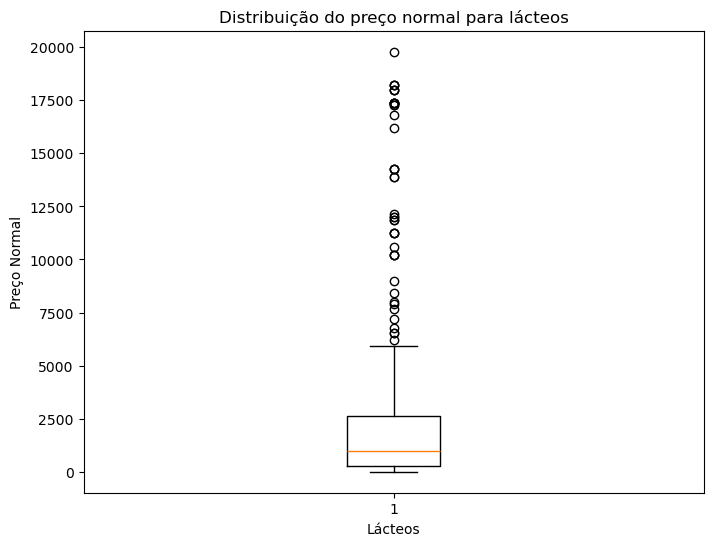

In [83]:
#Seu código aqui
# Dados da categoria "lacteos"
df_categoria = df.loc[df['Categoria'] == 'lacteos']

# Plotar o boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(df_categoria['Preco_Normal'], vert=True)
plt.title(f"Distribuição do preço normal para {"lácteos"}")
plt.xlabel("Lácteos")
plt.ylabel("Preço Normal")
plt.show()

A distribuição desses dados, conforme podemos observar no BoxPlot acima, apresenta diversos valores acima do limite estatístico para o qual podemos considerar uma distribuição normal. Ou seja, no caso dessa categoria, há muitos outliers, que influenciam diretamente nos valores da média (ser muito superior à mediana) e desvio padrão (o mais alto observado para o conjunto de dados).

# 4 - Plote um gráfico de barras onde temos a média de descontos por categoria.

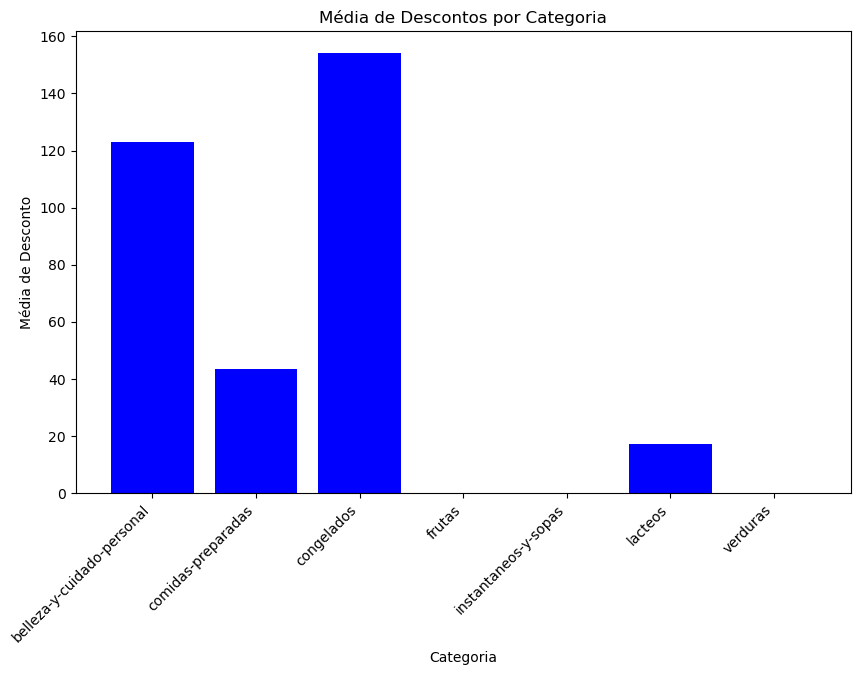

In [84]:
# Seu código aqui
# Cálculo da média de descontos por categoria
desconto_medio = df.groupby("Categoria")["Desconto"].mean().reset_index()

# Plotar gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(desconto_medio["Categoria"], desconto_medio["Desconto"], color='blue')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Categoria")
plt.ylabel("Média de Desconto")
plt.title("Média de Descontos por Categoria")
plt.show()

# 5 - Plote um gráfico de mapa interativo agrupando os dados por categoria, marca e trazendo a média de desconto.

In [85]:
# Seu código aqui
# Cálculo da média de desconto por categoria e marca
desconto_medio = df.groupby(["Categoria", "Marca"])["Desconto"].mean().reset_index()

# Criar um gráfico de dispersão interativo
fig = px.scatter(
    desconto_medio,
    x="Categoria",
    y="Marca",
    color="Desconto",
    size="Desconto",
    hover_data=["Categoria", "Marca"],
    title="Mapa Interativo - Média de Desconto por Categoria e Marca",
    height=1000
)
fig.update_xaxes(title_text="Categorias")
fig.update_yaxes(title_text="Marcas")
fig.show()

Sinta-se à vontade para ampliar o gráfico interativo, para analisar as outras marcas presentes no conjunto de dados.